In [1]:
from screenTools import *

controls = []
plate_order = [1,1,2,2] #plate 1 housed 104 hits, plate 2 housed 86 hits
peptide_order = ['104','86','104','86']

raw = importPlates(
    './data/AM_rescreen_cmr/am-rescreen-cmr2.xlsx', 
    plate_list=plate_order, 
    peptide_list=peptide_order
    ).pipe(assignControls,controls)
raw

,row,column,value,plate_number,peptide,condition
0,A,1,4937,1,104,experimental
1,A,2,10201,1,104,experimental
2,A,3,10097,1,104,experimental
3,A,4,9427,1,104,experimental
4,A,5,5020,1,104,experimental
...,...,...,...,...,...,...
79,G,8,4,2,86,experimental
80,G,9,6,2,86,experimental
81,G,10,6,2,86,experimental
82,G,11,0,2,86,experimental


In [2]:
pp = raw.pipe(pivotPlates).pipe(computeRatios)
pp.head()

/Users/rathbunc/opt/anaconda3/envs/general-ml/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


plate_number row column     condition    value               104/86  \
peptide                                            104         86             
0                  1   A      1  experimental   4937.0   883754.0 -2.252868   
1                  1   A     10  experimental   1091.0   442688.0 -2.608273   
2                  1   A     11  experimental  11348.0   905625.0 -1.902029   
3                  1   A     12  experimental   6869.0   782260.0 -2.056458   
4                  1   A      2  experimental  10201.0  1097862.0 -2.031905   

           86/104  
peptide            
0        2.252868  
1        2.608273  
2        1.902029  
3        2.056458  
4        2.031905

/Users/rathbunc/opt/anaconda3/envs/general-ml/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/Users/rathbunc/opt/anaconda3/envs/general-ml/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


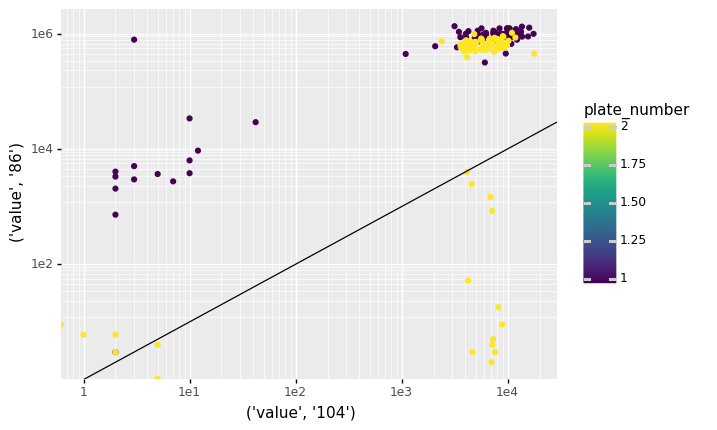

<ggplot: (8772859973970)>

In [3]:
import plotnine as pn

(
    pn.ggplot(pp, pn.aes(x=pp['value', '104'], y=pp['value', '86'], 
    color='plate_number',
    #color='condition',
    ))
    + pn.geom_point()
    + pn.scale_y_log10()
    + pn.geom_abline(intercept=0, slope=1)
    + pn.scale_x_log10()
)

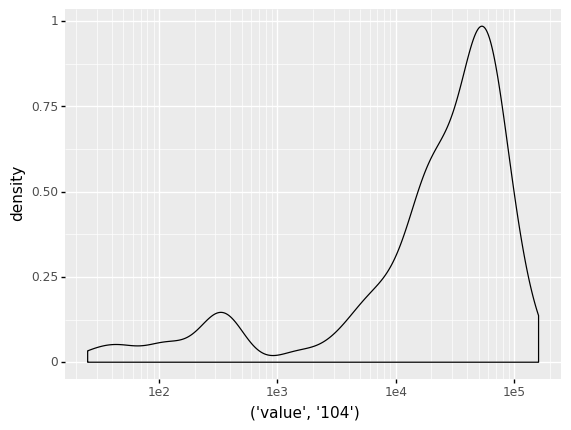

<ggplot: (8781347042557)>

In [50]:
(pn.ggplot(pp, pn.aes(pp['value', '104']))
+ pn.geom_density()
    # + pn.geom_dotplot()
    # + pn.facet_wrap("plate_number")
    + pn.scale_x_log10()
)

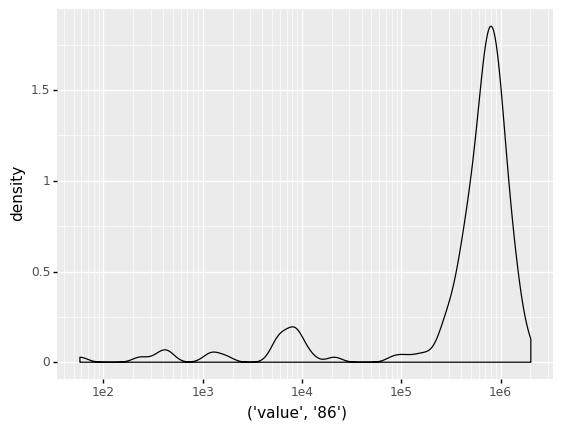

<ggplot: (8781397733262)>

In [51]:
(pn.ggplot(pp, pn.aes(pp['value', '86']))
+ pn.geom_density()
    # + pn.geom_dotplot()
    # + pn.facet_wrap("plate_number")
    + pn.scale_x_log10()
)

In [32]:

    a = find_hits_by_plate(
        pp, -1, 1, 1
    )

    a.head()


plate_number row column     condition  value            104/86  \
peptide                                          104      86             
0                  1   A      1      positive    346    8355 -1.382870   
1                  1   A     10  experimental  13221  476989 -1.557244   
2                  1   A     11  experimental   5855  363195 -1.792613   
3                  1   A     12  experimental  62305  553178 -0.948342   
4                  1   A      2      positive    346    8984 -1.414394   

           86/104   to_pick  
peptide                      
0        1.382870  positive  
1        1.557244        86  
2        1.792613        86  
3        0.948342       104  
4        1.414394  positive

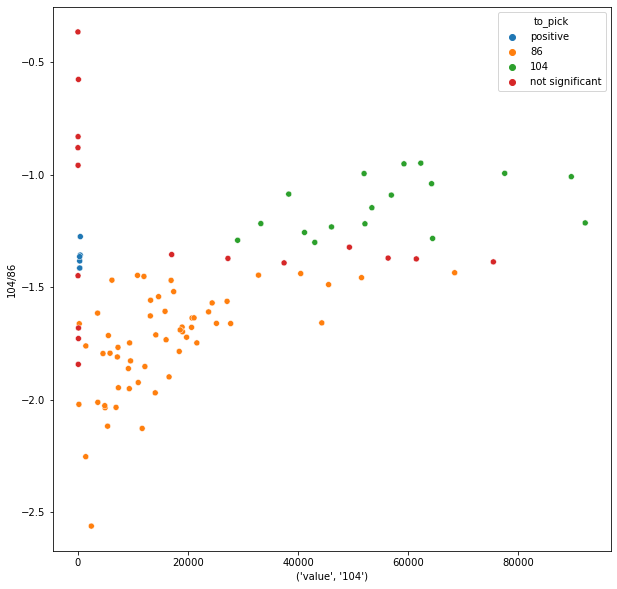

In [36]:
plot_performance(a[a['plate_number']==1], '104', '86')

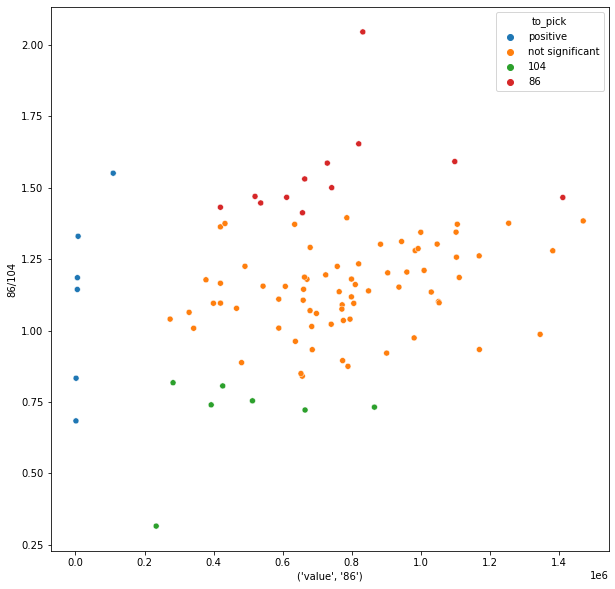

In [37]:
plot_performance(a[a['plate_number']==2], '86', '104')

In [56]:
a[
    (a['value','104'] > 10000) &
    (a['plate_number']==1) &
    (a['condition']=='experimental')
    ].sort_values('104/86', ascending=False)[:10]

plate_number row column     condition  value             104/86  \
peptide                                          104       86             
3                  1   A     12  experimental  62305   553178 -0.948342   
15                 1   B     12  experimental  59249   529752 -0.951392   
27                 1   C     12  experimental  77548   764157 -0.993612   
17                 1   B      3  experimental  52003   513539 -0.994545   
72                 1   G      1  experimental  89644   914147 -1.008495   
39                 1   D     12  experimental  64263   704102 -1.039675   
9                  1   A      7  experimental  38313   466835 -1.085817   
51                 1   E     12  experimental  56955   701137 -1.090271   
13                 1   B     10  experimental  53419   748355 -1.146412   
49                 1   E     10  experimental  92170  1508043 -1.213824   

           86/104 to_pick  
peptide                    
3        0.948342     104  
15       0.951392     104  
27       0.993612     104  
17       0.994545     104  
72       1.008495     104  
39       1.039675     104  
9        1.085817     104  
51       1.090271     104  
13       1.146412     104  
49       1.213824     104

In [52]:
a[
    (a['value','86'] > 100000) &
    (a['plate_number']==2) &
    (a['condition']=='experimental')
    ].sort_values('86/104', ascending=False)[:10]

plate_number row column     condition  value             104/86  \
peptide                                          104       86             
152                2   E      6  experimental   7496   832388 -2.045496   
163                2   F      5  experimental  18212   820604 -1.653776   
118                2   B      8  experimental  28128  1098892 -1.591816   
165                2   F      7  experimental  18913   729585 -1.586315   
148                2   E      2  experimental  19557   664039 -1.530891   
119                2   B      9  experimental  23455   742282 -1.500333   
161                2   F      3  experimental  17637   520199 -1.469745   
104                2   A      6  experimental  20895   611765 -1.466542   
140                2   D      6  experimental  48284  1411905 -1.466002   
122                2   C     11  experimental  19179   536566 -1.446797   

           86/104 to_pick  
peptide                    
152      2.045496      86  
163      1.653776      86  
118      1.591816      86  
165      1.586315      86  
148      1.530891      86  
119      1.500333      86  
161      1.469745      86  
104      1.466542      86  
140      1.466002      86  
122      1.446797      86